## Gathering data from Api

In [1]:
import pandas as pd
import requests
import json
import pprint
import matplotlib.pyplot as plt

C:\Users\shahj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\requests\__init__.py:109: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (5.2.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  warnings.warn(


In [2]:
response = requests.get('https://catalog.data.gov/api/3/action/package_show?id=traffic-crashes-crashes')

In [3]:
response_dict = json.loads(response.content)

In [4]:
assert response_dict['success'] is True

In [5]:
data = response_dict['result']

In [6]:
pprint.pprint(data)

{'author': None,
 'author_email': None,
 'creator_user_id': '2b785922-9f13-491b-a3c2-2a40acbd80c2',
 'extras': [{'key': 'resource-type', 'value': 'Dataset'},
            {'key': 'source_hash',
             'value': 'a33f0b5eb196de7c635315a7b984accf63203308bb5f550c0a954d2f816cffef'},
            {'key': 'source_datajson_identifier', 'value': True},
            {'key': 'source_schema_version', 'value': '1.1'},
            {'key': 'accessLevel', 'value': 'public'},
            {'key': 'identifier',
             'value': 'https://data.cityofchicago.org/api/views/85ca-t3if'},
            {'key': 'issued', 'value': '2023-07-27'},
            {'key': 'landingPage',
             'value': 'https://data.cityofchicago.org/d/85ca-t3if'},
            {'key': 'modified', 'value': '2024-02-08'},
            {'key': 'publisher', 'value': 'data.cityofchicago.org'},
            {'key': 'theme', 'value': ['Transportation']},
            {'key': 'catalog_@context',
             'value': 'https://project-o

In [7]:
data_url = data['resources'][0]['url']
data_format = data['resources'][0]['format']
print('Data format:  ' + data_format)
print(data_url)
csv = ['comma-separated-values', 'CSV', 'csv']

Data format:  CSV
https://data.cityofchicago.org/api/views/85ca-t3if/rows.csv?accessType=DOWNLOAD


In [8]:
df = pd.read_csv(data_url)

In [9]:
df.columns

Index(['CRASH_RECORD_ID', 'CRASH_DATE_EST_I', 'CRASH_DATE',
       'POSTED_SPEED_LIMIT', 'TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION',
       'WEATHER_CONDITION', 'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE',
       'TRAFFICWAY_TYPE', 'LANE_CNT', 'ALIGNMENT', 'ROADWAY_SURFACE_COND',
       'ROAD_DEFECT', 'REPORT_TYPE', 'CRASH_TYPE', 'INTERSECTION_RELATED_I',
       'NOT_RIGHT_OF_WAY_I', 'HIT_AND_RUN_I', 'DAMAGE', 'DATE_POLICE_NOTIFIED',
       'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE', 'STREET_NO',
       'STREET_DIRECTION', 'STREET_NAME', 'BEAT_OF_OCCURRENCE',
       'PHOTOS_TAKEN_I', 'STATEMENTS_TAKEN_I', 'DOORING_I', 'WORK_ZONE_I',
       'WORK_ZONE_TYPE', 'WORKERS_PRESENT_I', 'NUM_UNITS',
       'MOST_SEVERE_INJURY', 'INJURIES_TOTAL', 'INJURIES_FATAL',
       'INJURIES_INCAPACITATING', 'INJURIES_NON_INCAPACITATING',
       'INJURIES_REPORTED_NOT_EVIDENT', 'INJURIES_NO_INDICATION',
       'INJURIES_UNKNOWN', 'CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH',
       'LATITUDE', 

In [10]:
df

,CRASH_RECORD_ID,CRASH_DATE_EST_I,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,...,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
0,6c1659069e9c6285a650e70d6f9b574ed5f64c12888479...,NaN,08/18/2023 12:50:00 PM,15,OTHER,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,OTHER,...,1.0,0.0,1.0,0.0,12,6,8,NaN,NaN,NaN
1,5f54a59fcb087b12ae5b1acff96a3caf4f2d37e79f8db4...,NaN,07/29/2023 02:45:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,DIVIDED - W/MEDIAN (NOT RAISED),...,0.0,0.0,1.0,0.0,14,7,7,41.854120,-87.665902,POINT (-87.665902342962 41.854120262952)
2,61fcb8c1eb522a6469b460e2134df3d15f82e81fd93e9c...,NaN,08/18/2023 05:58:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PEDALCYCLIST,NOT DIVIDED,...,1.0,0.0,1.0,0.0,17,6,8,41.942976,-87.761883,POINT (-87.761883496974 41.942975745006)
3,004cd14d0303a9163aad69a2d7f341b7da2a8572b2ab33...,NaN,11/26/2019 08:38:00 AM,25,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PEDESTRIAN,ONE-WAY,...,0.0,0.0,1.0,0.0,8,3,11,NaN,NaN,NaN
4,a1d5f0ea90897745365a4cbb06cc60329a120d89753fac...,NaN,08/18/2023 10:45:00 AM,20,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,FIXED OBJECT,OTHER,...,0.0,0.0,1.0,0.0,10,6,8,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
804684,89dc61af34d393db950397f0cc06d53b56d1f5e5fa14d4...,NaN,06/26/2023 04:50:00 PM,35,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,SIDESWIPE SAME DIRECTION,DIVIDED - W/MEDIAN (NOT RAISED),...,0.0,0.0,4.0,0.0,16,2,6,41.746905,-87.644077,POINT (-87.644077151581 41.746904607442)
804685,5c36f4e91b3deefd051dee799c3957b198389d8fe01247...,NaN,01/06/2020 01:03:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,ANGLE,NOT DIVIDED,...,0.0,0.0,2.0,0.0,13,2,1,41.887091,-87.766594,POINT (-87.766594246183 41.887090677713)
804686,ad95aaea32d4ec23aa4749ee3e1157d2a52f803c0e325d...,NaN,03/19/2020 04:50:00 PM,30,NO CONTROLS,NO CONTROLS,RAIN,DAYLIGHT,PARKED MOTOR VEHICLE,NOT DIVIDED,...,0.0,0.0,1.0,0.0,16,5,3,41.775367,-87.707177,POINT (-87.70717711961 41.775366546433)
804687,67dd84a904e46800b722c9f368de8b3e634864ff30099a...,NaN,03/04/2019 06:40:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING,NOT DIVIDED,...,0.0,0.0,2.0,0.0,18,2,3,41.953760,-87.727480,POINT (-87.727480334329 41.953759575772)


## Data Cleaning

There are a lot of columns which we wont need in our process, so we will drop them.

In [11]:
df_new = df.drop(columns=['CRASH_DATE_EST_I','REPORT_TYPE','LANE_CNT','INTERSECTION_RELATED_I','NOT_RIGHT_OF_WAY_I','HIT_AND_RUN_I','DATE_POLICE_NOTIFIED', 'BEAT_OF_OCCURRENCE','PHOTOS_TAKEN_I','STATEMENTS_TAKEN_I','DOORING_I','WORK_ZONE_I','WORK_ZONE_TYPE','WORKERS_PRESENT_I','LATITUDE','LONGITUDE','LOCATION'])

In [12]:
df_new

,CRASH_RECORD_ID,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,ALIGNMENT,...,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH
0,6c1659069e9c6285a650e70d6f9b574ed5f64c12888479...,08/18/2023 12:50:00 PM,15,OTHER,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,OTHER,STRAIGHT AND LEVEL,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,12,6,8
1,5f54a59fcb087b12ae5b1acff96a3caf4f2d37e79f8db4...,07/29/2023 02:45:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,DIVIDED - W/MEDIAN (NOT RAISED),STRAIGHT AND LEVEL,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,14,7,7
2,61fcb8c1eb522a6469b460e2134df3d15f82e81fd93e9c...,08/18/2023 05:58:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PEDALCYCLIST,NOT DIVIDED,STRAIGHT AND LEVEL,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,17,6,8
3,004cd14d0303a9163aad69a2d7f341b7da2a8572b2ab33...,11/26/2019 08:38:00 AM,25,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PEDESTRIAN,ONE-WAY,CURVE ON GRADE,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,8,3,11
4,a1d5f0ea90897745365a4cbb06cc60329a120d89753fac...,08/18/2023 10:45:00 AM,20,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,FIXED OBJECT,OTHER,STRAIGHT AND LEVEL,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,10,6,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
804684,89dc61af34d393db950397f0cc06d53b56d1f5e5fa14d4...,06/26/2023 04:50:00 PM,35,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,SIDESWIPE SAME DIRECTION,DIVIDED - W/MEDIAN (NOT RAISED),STRAIGHT AND LEVEL,...,0.0,0.0,0.0,0.0,0.0,4.0,0.0,16,2,6
804685,5c36f4e91b3deefd051dee799c3957b198389d8fe01247...,01/06/2020 01:03:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,ANGLE,NOT DIVIDED,STRAIGHT AND LEVEL,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,13,2,1
804686,ad95aaea32d4ec23aa4749ee3e1157d2a52f803c0e325d...,03/19/2020 04:50:00 PM,30,NO CONTROLS,NO CONTROLS,RAIN,DAYLIGHT,PARKED MOTOR VEHICLE,NOT DIVIDED,STRAIGHT AND LEVEL,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,16,5,3
804687,67dd84a904e46800b722c9f368de8b3e634864ff30099a...,03/04/2019 06:40:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING,NOT DIVIDED,STRAIGHT AND LEVEL,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,18,2,3


Now we look for null values

In [13]:
df_new.isnull().sum()

CRASH_RECORD_ID                     0
CRASH_DATE                          0
POSTED_SPEED_LIMIT                  0
TRAFFIC_CONTROL_DEVICE              0
DEVICE_CONDITION                    0
WEATHER_CONDITION                   0
LIGHTING_CONDITION                  0
FIRST_CRASH_TYPE                    0
TRAFFICWAY_TYPE                     0
ALIGNMENT                           0
ROADWAY_SURFACE_COND                0
ROAD_DEFECT                         0
CRASH_TYPE                          0
DAMAGE                              0
PRIM_CONTRIBUTORY_CAUSE             0
SEC_CONTRIBUTORY_CAUSE              0
STREET_NO                           0
STREET_DIRECTION                    4
STREET_NAME                         1
NUM_UNITS                           0
MOST_SEVERE_INJURY               1772
INJURIES_TOTAL                   1760
INJURIES_FATAL                   1760
INJURIES_INCAPACITATING          1760
INJURIES_NON_INCAPACITATING      1760
INJURIES_REPORTED_NOT_EVIDENT    1760
INJURIES_NO_

In [14]:
df_new = df_new[~df_new['MOST_SEVERE_INJURY'].isnull()]
df_new['CRASH_DATE'] = pd.to_datetime(df_new['CRASH_DATE'])


C:\Users\shahj\AppData\Local\Temp\ipykernel_11652\740663586.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['CRASH_DATE'] = pd.to_datetime(df_new['CRASH_DATE'])


In [15]:
df_new.isnull().sum()

CRASH_RECORD_ID                  0
CRASH_DATE                       0
POSTED_SPEED_LIMIT               0
TRAFFIC_CONTROL_DEVICE           0
DEVICE_CONDITION                 0
WEATHER_CONDITION                0
LIGHTING_CONDITION               0
FIRST_CRASH_TYPE                 0
TRAFFICWAY_TYPE                  0
ALIGNMENT                        0
ROADWAY_SURFACE_COND             0
ROAD_DEFECT                      0
CRASH_TYPE                       0
DAMAGE                           0
PRIM_CONTRIBUTORY_CAUSE          0
SEC_CONTRIBUTORY_CAUSE           0
STREET_NO                        0
STREET_DIRECTION                 4
STREET_NAME                      1
NUM_UNITS                        0
MOST_SEVERE_INJURY               0
INJURIES_TOTAL                   0
INJURIES_FATAL                   0
INJURIES_INCAPACITATING          0
INJURIES_NON_INCAPACITATING      0
INJURIES_REPORTED_NOT_EVIDENT    0
INJURIES_NO_INDICATION           0
INJURIES_UNKNOWN                 0
CRASH_HOUR          

In [16]:
 df_new['STREET_DIRECTION'].fillna('N',inplace= True)

C:\Users\shahj\AppData\Local\Temp\ipykernel_11652\2592392866.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['STREET_DIRECTION'].fillna('N',inplace= True)


In [17]:
 df_new['STREET_NAME'].fillna('UNKNOWN',inplace= True)

C:\Users\shahj\AppData\Local\Temp\ipykernel_11652\3482912273.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['STREET_NAME'].fillna('UNKNOWN',inplace= True)


In [18]:
df_new.isnull().sum()

CRASH_RECORD_ID                  0
CRASH_DATE                       0
POSTED_SPEED_LIMIT               0
TRAFFIC_CONTROL_DEVICE           0
DEVICE_CONDITION                 0
WEATHER_CONDITION                0
LIGHTING_CONDITION               0
FIRST_CRASH_TYPE                 0
TRAFFICWAY_TYPE                  0
ALIGNMENT                        0
ROADWAY_SURFACE_COND             0
ROAD_DEFECT                      0
CRASH_TYPE                       0
DAMAGE                           0
PRIM_CONTRIBUTORY_CAUSE          0
SEC_CONTRIBUTORY_CAUSE           0
STREET_NO                        0
STREET_DIRECTION                 0
STREET_NAME                      0
NUM_UNITS                        0
MOST_SEVERE_INJURY               0
INJURIES_TOTAL                   0
INJURIES_FATAL                   0
INJURIES_INCAPACITATING          0
INJURIES_NON_INCAPACITATING      0
INJURIES_REPORTED_NOT_EVIDENT    0
INJURIES_NO_INDICATION           0
INJURIES_UNKNOWN                 0
CRASH_HOUR          

## EDA

In [19]:
print(df_new.dtypes)

CRASH_RECORD_ID                          object
CRASH_DATE                       datetime64[ns]
POSTED_SPEED_LIMIT                        int64
TRAFFIC_CONTROL_DEVICE                   object
DEVICE_CONDITION                         object
WEATHER_CONDITION                        object
LIGHTING_CONDITION                       object
FIRST_CRASH_TYPE                         object
TRAFFICWAY_TYPE                          object
ALIGNMENT                                object
ROADWAY_SURFACE_COND                     object
ROAD_DEFECT                              object
CRASH_TYPE                               object
DAMAGE                                   object
PRIM_CONTRIBUTORY_CAUSE                  object
SEC_CONTRIBUTORY_CAUSE                   object
STREET_NO                                 int64
STREET_DIRECTION                         object
STREET_NAME                              object
NUM_UNITS                                 int64
MOST_SEVERE_INJURY                      

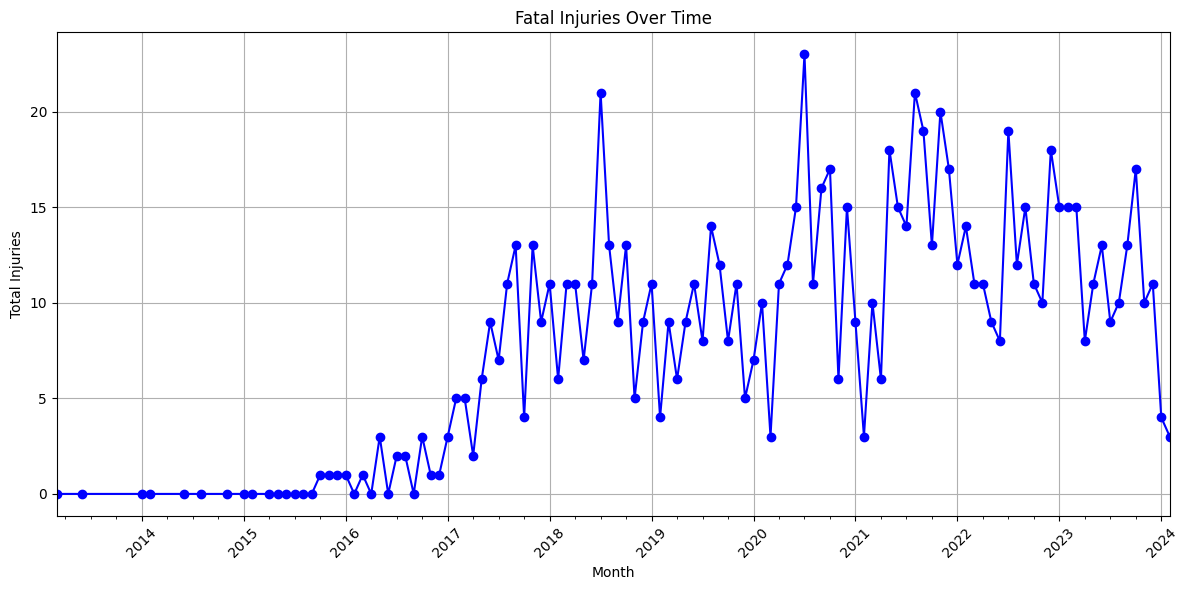

In [23]:
injuries_over_time = df_new.groupby(df_new['CRASH_DATE'].dt.to_period('M'))['INJURIES_FATAL'].sum()

plt.figure(figsize=(12, 6))
injuries_over_time.plot(marker='o', color='blue', linestyle='-')
plt.title('Fatal Injuries Over Time')
plt.xlabel('Month')
plt.ylabel('Total Injuries')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

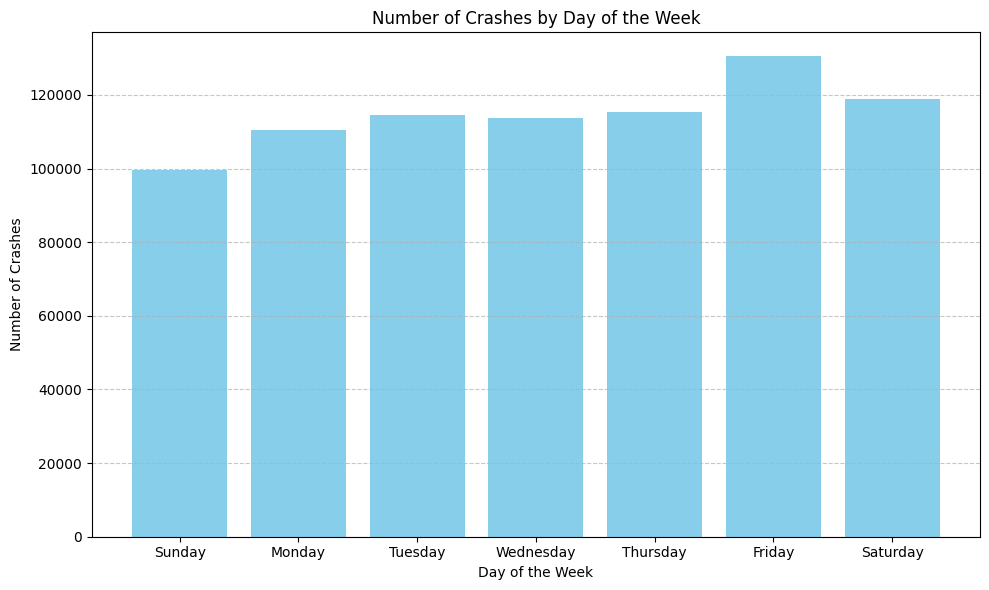

In [30]:
day_counts = df_new['CRASH_DAY_OF_WEEK'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.bar(day_counts.index, day_counts.values, color='skyblue')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Crashes')
plt.title('Number of Crashes by Day of the Week')
plt.xticks(day_counts.index, ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

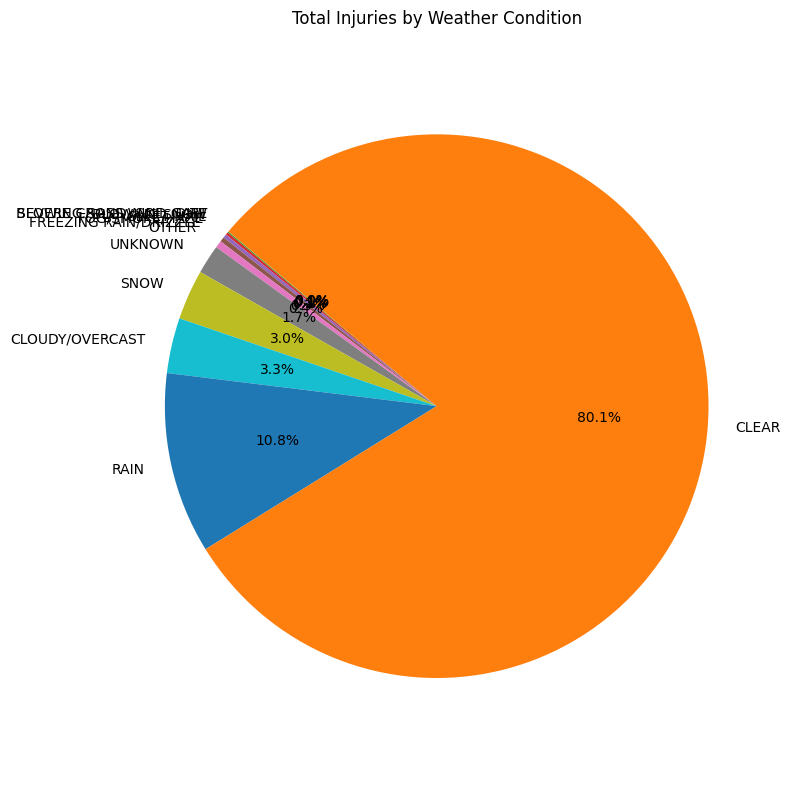

In [31]:

weather_injuries = df_new.groupby('WEATHER_CONDITION')['INJURIES_TOTAL'].sum().sort_values()

plt.figure(figsize=(8, 8))
plt.pie(weather_injuries, labels=weather_injuries.index, autopct='%1.1f%%', startangle=140)
plt.title('Total Injuries by Weather Condition')
plt.axis('equal') 
plt.tight_layout()
plt.show()

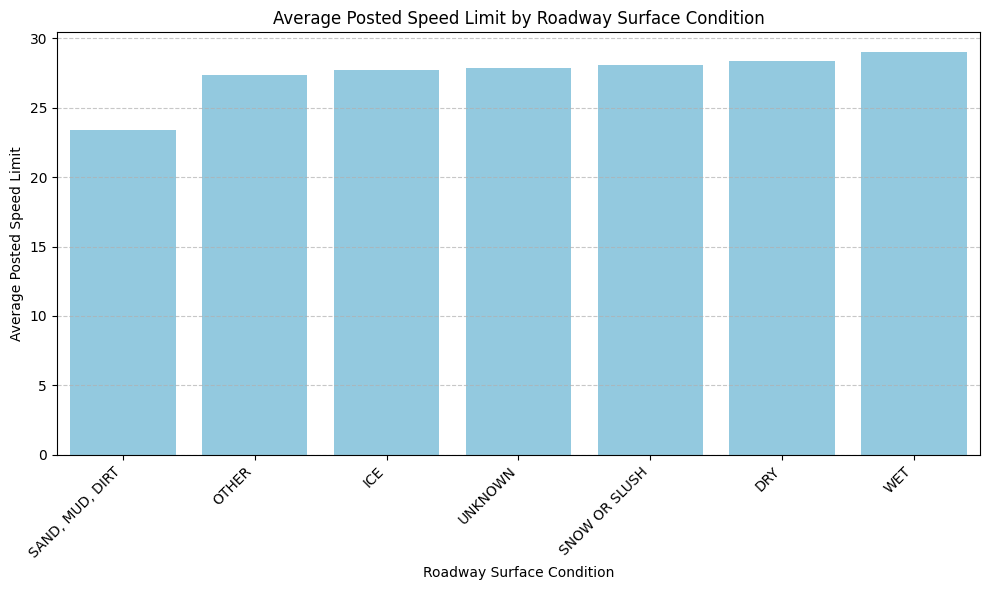

In [34]:
import seaborn as sns
roadway_speed_limit = df_new.groupby('ROADWAY_SURFACE_COND')['POSTED_SPEED_LIMIT'].mean().sort_values()

plt.figure(figsize=(10, 6))
sns.barplot(x=roadway_speed_limit.index, y=roadway_speed_limit.values, color='skyblue')
plt.xlabel('Roadway Surface Condition')
plt.ylabel('Average Posted Speed Limit')
plt.title('Average Posted Speed Limit by Roadway Surface Condition')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

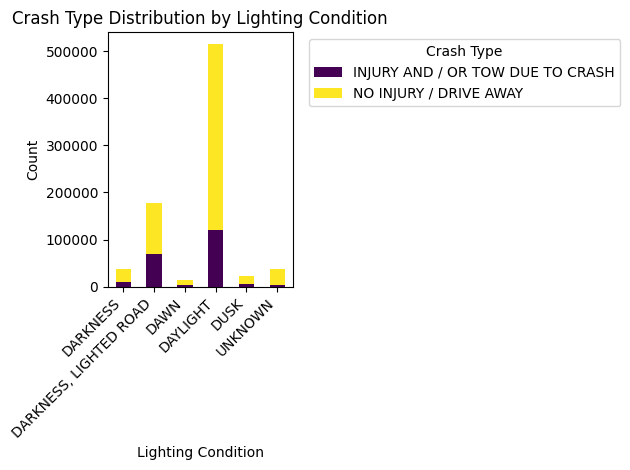

In [35]:
lighting_crash_type = df_new.groupby(['LIGHTING_CONDITION', 'CRASH_TYPE']).size().unstack()

plt.figure(figsize=(10, 6))
lighting_crash_type.plot(kind='bar', stacked=True, colormap='viridis')
plt.xlabel('Lighting Condition')
plt.ylabel('Count')
plt.title('Crash Type Distribution by Lighting Condition')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Crash Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

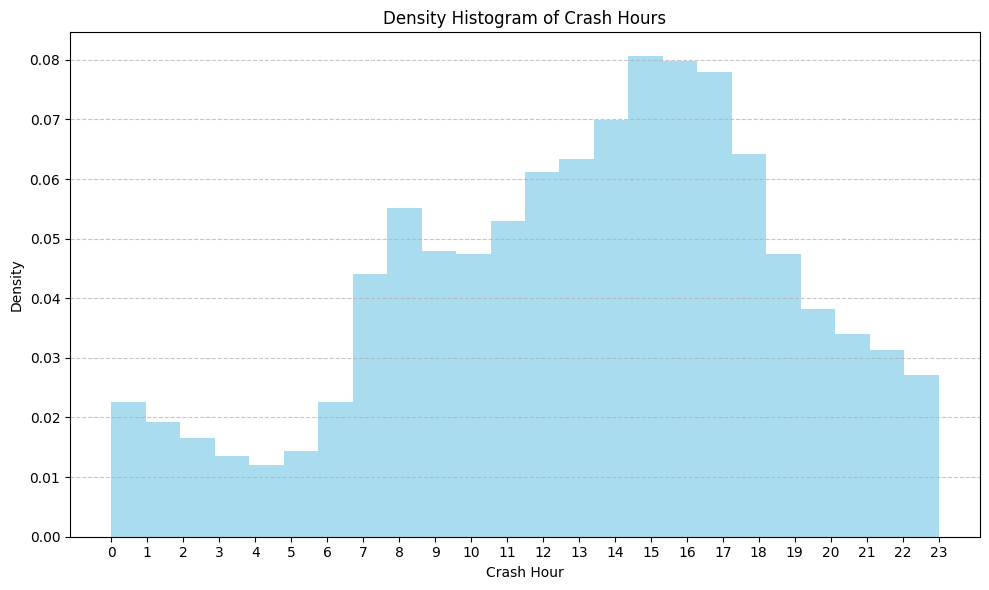

In [37]:
plt.figure(figsize=(10, 6))
plt.hist(df_new['CRASH_HOUR'], bins=24, density=True, color='skyblue', alpha=0.7)
plt.xlabel('Crash Hour')
plt.ylabel('Density')
plt.title('Density Histogram of Crash Hours')
plt.xticks(range(24))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

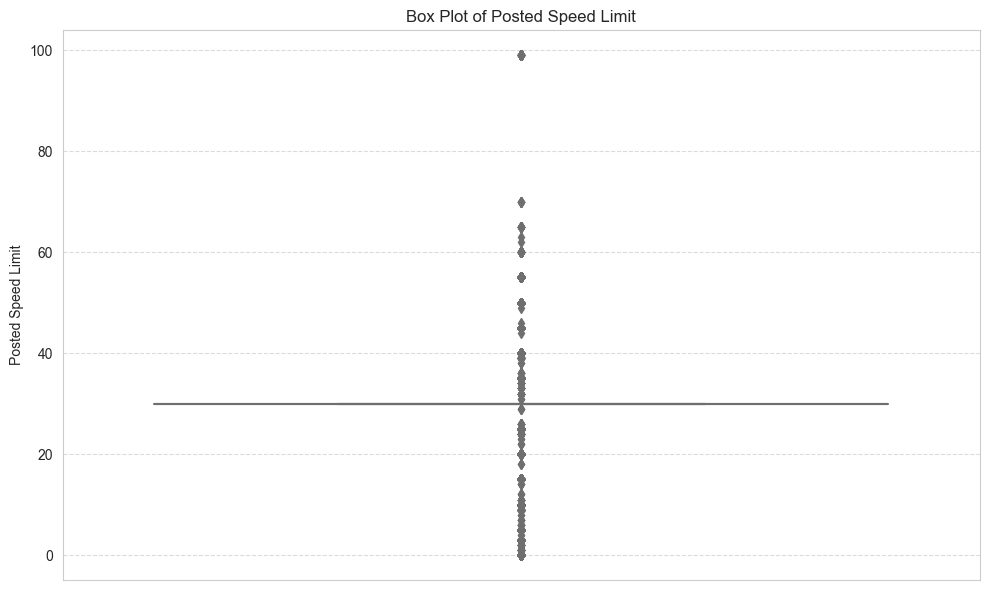

In [40]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_new, y='POSTED_SPEED_LIMIT', color='skyblue')
plt.ylabel('Posted Speed Limit')
plt.title('Box Plot of Posted Speed Limit')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

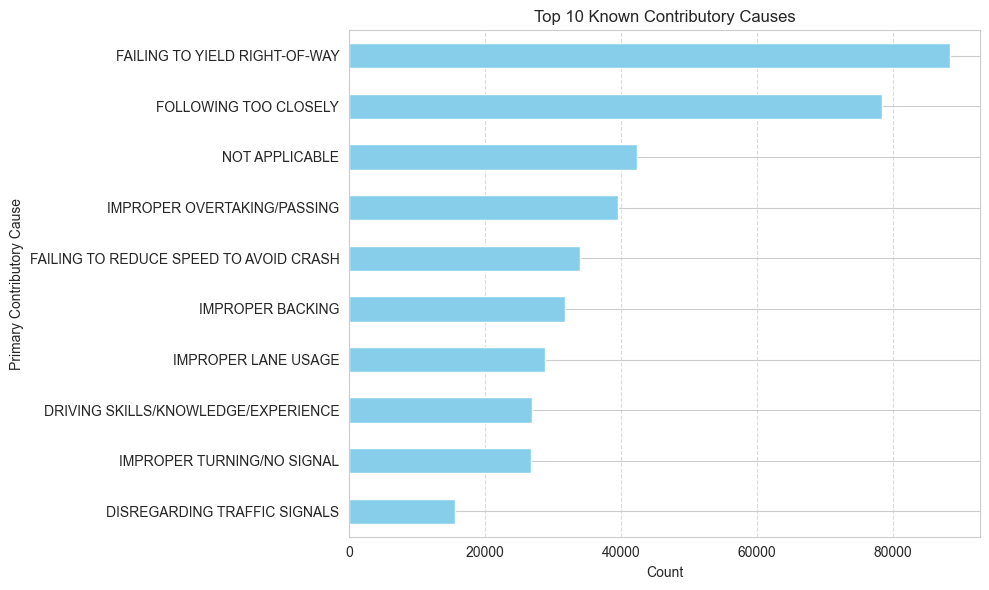

In [46]:
top_10_causes = df_new['PRIM_CONTRIBUTORY_CAUSE'].value_counts().nlargest(11)[1:]


plt.figure(figsize=(10, 6))
top_10_causes.plot(kind='barh', color='skyblue')
plt.xlabel('Count')
plt.ylabel('Primary Contributory Cause')
plt.title('Top 10 Known Contributory Causes')
plt.gca().invert_yaxis()  
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

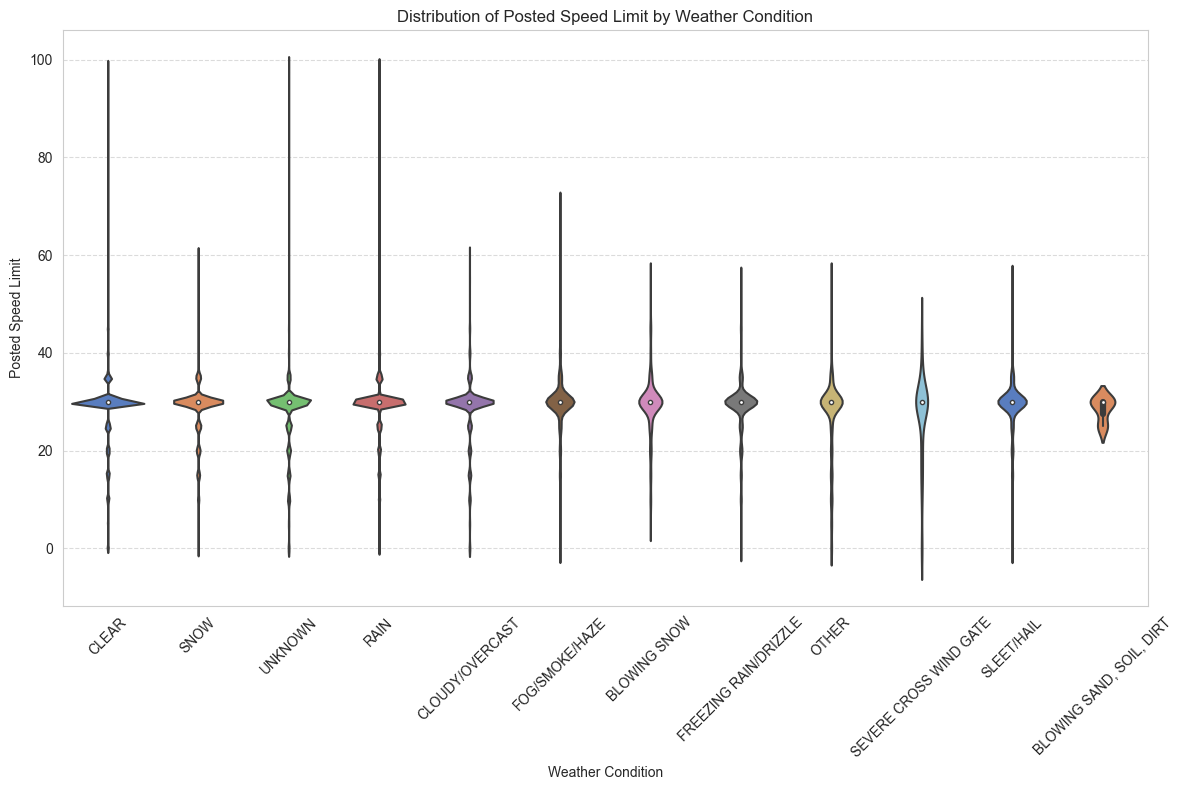

In [47]:
plt.figure(figsize=(12, 8))
sns.violinplot(data=df_new, x='WEATHER_CONDITION', y='POSTED_SPEED_LIMIT', palette='muted')
plt.xlabel('Weather Condition')
plt.ylabel('Posted Speed Limit')
plt.title('Distribution of Posted Speed Limit by Weather Condition')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

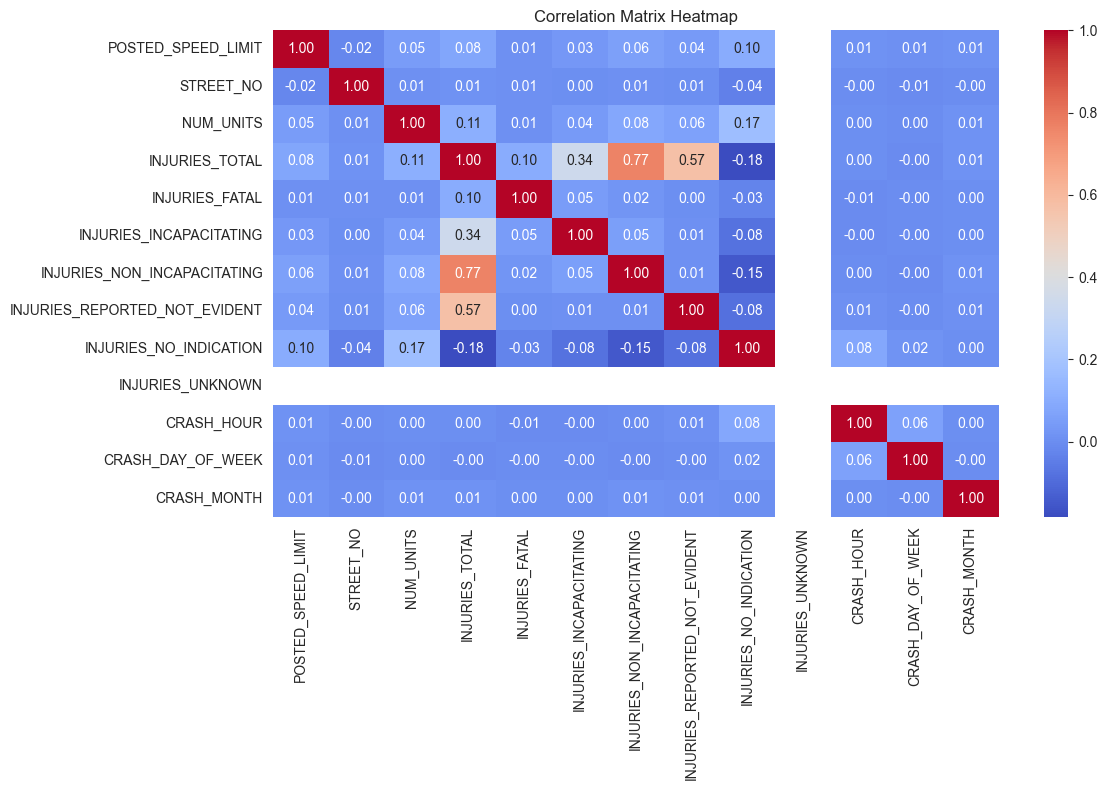

In [48]:
correlation_matrix = df_new.corr()


plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.tight_layout()
plt.show()